<a href="https://colab.research.google.com/github/Iuky-O/Avanti-Bootcamp_Machine-Learning/blob/main/Segmenta%C3%A7%C3%A3o_Iumy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

# Iumy Pimentel - Avanti Bootcamp - Atividade 1
Questão 1


Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

Importando a imagem do computador

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving gatinhos1.jpg to gatinhos1.jpg


Carregando a imagem

In [ ]:
image_path = 'gatinhos1.jpg';
image = cv2.imread(image_path);

Convertendo BGR para RGB

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Exibindo a imagem

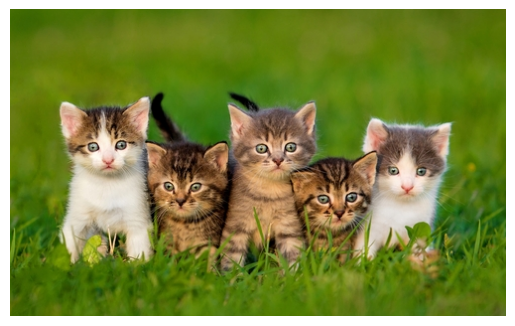

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Buscando e exibindo dados da imagem

In [ ]:
if image is not None:
  height, width, channels = image.shape

  for i in range(3):
    pixel = image[i, i]
    print(f'Pixel {i + 1}: Valor BGR: {pixel}')

    properties = [
        ('Altura', image.shape[0]),
        ('Largura', image.shape[1]),
        ('Canais de Cor', image.shape[2]),
        ('Tipo de Dado', image.dtype),
        ('Máximo tom de cinza', image.max()),
        ('Médio tom de cinza', image.mean()),
        ('Mínimo tom de cinza', image.min())
    ]

  for prop_name, prop_values in properties:
    print(f"{prop_name} : {prop_values}")

Pixel 1: Valor BGR: [  5 111  72]
Pixel 2: Valor BGR: [  4 110  71]
Pixel 3: Valor BGR: [  4 107  69]
Altura : 309
Largura : 500
Canais de Cor : 3
Tipo de Dado : uint8
Máximo tom de cinza : 255
Médio tom de cinza : 91.7331024811219
Mínimo tom de cinza : 0


# Iumy Pimentel - Avanti Bootcamp - Atividade 2
Questão 2

Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

Importando a Imagem do Computador

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cachorrinhos.jpg to cachorrinhos.jpg


Carregando A Imagem

In [ ]:
image_path = 'cachorrinhos.jpg';
image2 = cv2.imread(image_path);

Convertendo BGR para RGB

In [ ]:
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

Exibindo a imagem

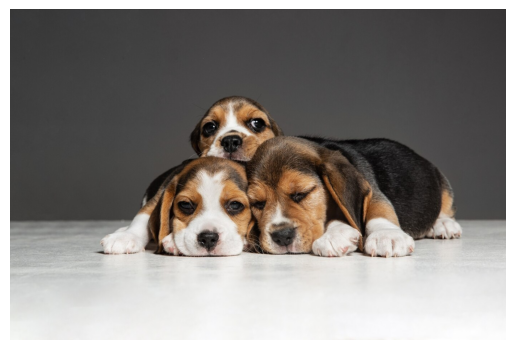

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Aplicando Filtros da Media, Mediana e Gaussiano

In [ ]:
media_image = cv2.blur(image_rgb, (15,15))

mediana_image = cv2.medianBlur(image_rgb, 15)

gaussiano_image = cv2.GaussianBlur(image_rgb, (15, 15), 0)

Plotar as imagens

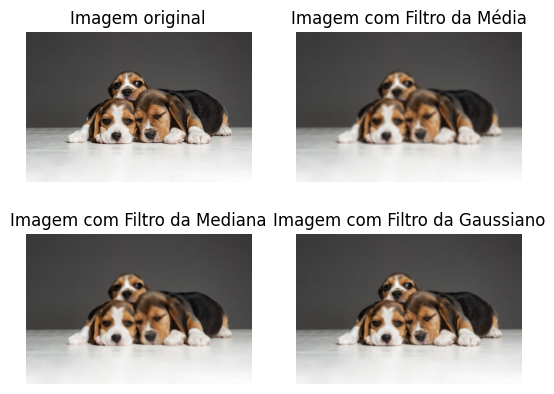

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Imagem original')

plt.subplot(2, 2, 2)
plt.imshow(media_image)
plt.axis('off')
plt.title('Imagem com Filtro da Média')

plt.subplot(2, 2, 3)
plt.imshow(mediana_image)
plt.axis('off')
plt.title('Imagem com Filtro da Mediana')

plt.subplot(2, 2, 4)
plt.imshow(gaussiano_image)
plt.axis('off')
plt.title('Imagem com Filtro da Gaussiano')

plt.show()

# Iumy Pimentel - Segmentação

## Importando arquivo do Dataset do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando bibliotecas

In [ ]:
import os
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout
from keras import Input, Model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import os: O módulo os fornece uma maneira de usar funcionalidades dependentes do sistema operacional, como ler ou escrever em arquivos, manipular diretórios, etc.

import tensorflow as tf: TensorFlow é uma biblioteca de código aberto usada principalmente para tarefas de aprendizado de máquina e deep learning. A abreviação tf é uma convenção comum.

import numpy as np: NumPy é uma biblioteca amplamente utilizada para computação numérica em Python. Ela fornece suporte para arrays multidimensionais e funções matemáticas para operar nesses arrays.

import keras: Keras é uma API de alto nível para construir e treinar modelos de aprendizado profundo. A partir da versão 2.3.0, o Keras é integrado diretamente ao TensorFlow.

import pandas as pd: Pandas é uma biblioteca que fornece estruturas de dados de alto desempenho e fáceis de usar, como o DataFrame, que é útil para manipulação e análise de dados.

import imageio.v2 as imageio: Imageio é uma biblioteca para ler e escrever imagens em vários formatos. A parte v2 indica que está sendo usado a versão 2 da biblioteca, e foi importada com um alias imageio para facilitar o uso.

import cv2: OpenCV (Open Source Computer Vision) é uma biblioteca popular para visão computacional. cv2 é uma convenção comum para importar o OpenCV em Python.

import matplotlib.pyplot as plt: Matplotlib é uma biblioteca para a criação de gráficos em Python. O módulo pyplot fornece uma interface semelhante à do MATLAB para plotagem de gráficos.

from keras.callbacks import EarlyStopping, ReduceLROnPlateau: Importa duas classes de callbacks do Keras. Callbacks são objetos que podem ser passados a um modelo para personalizar seu comportamento durante o treinamento. EarlyStopping permite interromper o treinamento se determinadas condições não melhorarem, e ReduceLROnPlateau ajusta a taxa de aprendizado se uma métrica monitorada parar de melhorar.

from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout: Importa várias camadas que podem ser usadas na construção de modelos de redes neurais usando Keras. Cada uma dessas camadas tem uma função específica, como convolução 2D, normalização em lote, ativação ReLU, upsampling, entre outras.

from keras import Input, Model: Importa as classes Input e Model do Keras. Input é usada para criar um tensor de entrada, e Model é usada para definir um modelo Keras, conectando camadas de entrada e saída.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2': Define uma variável de ambiente do sistema para controlar a exibição de mensagens de log pelo TensorFlow. Neste caso, o valor '2' significa que apenas mensagens de erro serão exibidas, suprimindo mensagens informativas.

## Pré-processamento e divisão de dados


filenames = sorted(os.listdir(folder_path)): Obtém a lista de nomes de arquivos no diretório especificado (folder_path) e a ordena.

images = [cv2.imread(os.path.join(folder_path, f)) for f in filenames if f.endswith('.png') and not (f.endswith('_mask.png') or f.endswith('_mask_1.png') or f.endswith('_mask_2.png'))]: Carrega imagens do diretório, excluindo aquelas cujos nomes indicam que são máscaras. As imagens são carregadas usando a função cv2.imread do OpenCV.

masks = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_GRAYSCALE) for f in filenames if f.endswith('_mask.png')]: Carrega máscaras do diretório. Estas são identificadas pelos nomes dos arquivos que terminam com '_mask.png'. As máscaras são carregadas em escala de cinza.

desired_size = (256, 256): Define o tamanho desejado para as imagens e máscaras após o redimensionamento.

images = [cv2.resize(image, desired_size) for image in images]: Redimensiona as imagens para o tamanho desejado.

masks = [cv2.resize(mask, desired_size, interpolation=cv2.INTER_NEAREST) for mask in masks]: Redimensiona as máscaras para o tamanho desejado usando a interpolação mais próxima (cv2.INTER_NEAREST), que é apropriada para imagens binárias.

images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]: Converte o formato de cores das imagens de BGR para RGB. Isso é necessário porque o OpenCV carrega imagens em formato BGR por padrão, enquanto muitas bibliotecas, como Matplotlib, esperam imagens no formato RGB.

images = [image / 255.0 for image in images] e masks = [mask / 255.0 for mask in masks]: Normaliza os valores de pixel das imagens e máscaras para o intervalo [0, 1], dividindo cada valor por 255.0.

images = np.array(images) e masks = np.array(masks): Converte as listas de imagens e máscaras para arrays NumPy.

return images, masks: Retorna as imagens e máscaras processadas como saída da função.

In [ ]:
def preprocess_images_and_masks(folder_path):

  # Sort the list of filenames
  filenames = sorted(os.listdir(folder_path))

  # Load the images and masks from the folder
  # Taking out multiple masks for one image because I am a coward
  images = [cv2.imread(os.path.join(folder_path, f)) for f in filenames if f.endswith('.png') and not (f.endswith('_mask.png') or f.endswith('_mask_1.png') or f.endswith('_mask_2.png'))]
  masks = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_GRAYSCALE) for f in filenames if f.endswith('_mask.png')]

  # Resize the images and masks to a desired size
  desired_size = (256, 256) #256
  images = [cv2.resize(image, desired_size) for image in images]
  masks = [cv2.resize(mask, desired_size, interpolation=cv2.INTER_NEAREST) for mask in masks]

  # Convert the images to RGB format (if they are not already)
  images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

  # Normalize the pixel values of the images and masks
  images = [image / 255.0 for image in images]
  masks = [mask / 255.0 for mask in masks]

  # Convert the images and masks to numpy arrays
  images = np.array(images)
  masks = np.array(masks)

  return images, masks

#### Definição dos Caminhos dos Três Diretórios

#### Pré-processamento das Imagens e Máscaras

#### Concatenação de Imagens e Máscaras

In [ ]:
import cv2
import numpy as np
# Define the paths to the three folders
benign_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/benign'
malignant_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/malignant'
normal_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/normal'

# Preprocess the images and masks from the folders
benign_images, benign_masks = preprocess_images_and_masks(benign_folder)
malignant_images, malignant_masks = preprocess_images_and_masks(malignant_folder)
normal_images, normal_masks = preprocess_images_and_masks(normal_folder)

# Concatenate the images and masks from the three folders
images = np.concatenate((benign_images, malignant_images, normal_images), axis=0)
masks = np.concatenate((benign_masks, malignant_masks, normal_masks), axis=0)

Este trecho de código é responsável por preparar um conjunto de imagens e máscaras (provavelmente utilizadas para tarefas de segmentação ou processamento de imagem) para divisão em conjuntos de treino, validação e teste.

Aqui está uma explicação passo a passo do que o código está fazendo:

Verificação de validade dos arrays:

Verifica se os arrays de imagens e máscaras estão vazios ou se têm tamanhos diferentes. Se forem vazios ou tiverem tamanhos diferentes, ele imprime mensagens de erro.
Embaralhamento das imagens e máscaras:

Se os arrays forem válidos, o código os combina em pares (imagem, máscara) e os embaralha juntos para garantir que a ordem não afete a distribuição nos conjuntos de treino, validação e teste.
Conversão para arrays numpy:

Após o embaralhamento, as listas combinadas de imagens e máscaras são convertidas em arrays numpy para facilitar a manipulação e divisão.
Cálculo do número de imagens em cada conjunto:

Calcula o número de imagens totais e, em seguida, define a quantidade de imagens para os conjuntos de treino (90%), validação (7.5%) e teste (o restante).
Divisão em conjuntos de treino, validação e teste:

Divide os arrays de imagens e máscaras nos conjuntos de treino, validação e teste, com base nos números calculados anteriormente.

train_images e train_masks: Recebem as primeiras imagens e máscaras até a quantidade estabelecida para treino.

val_images e val_masks: Recebem as imagens e máscaras para validação, que vão desde o final do conjunto de treino até a quantidade estabelecida para validação.

test_images e test_masks: Recebem as imagens e máscaras restantes, destinadas ao conjunto de teste.

Este processo é comum em aprendizado de máquina, garantindo que os conjuntos de treino, validação e teste sejam representativos dos dados disponíveis, o que é crucial para avaliar e validar o desempenho de um modelo.

In [ ]:
# Check the dimensions of the images and masks arrays
if len(images) == 0 or len(masks) == 0:
  print("Error: Images or masks array is empty")
elif len(images) != len(masks):
  print("Error: Mismatch in number of images and masks")
else:
  # Shuffle the images and masks together
  combined = list(zip(images, masks))
  np.random.shuffle(combined)
  images, masks = zip(*combined)

  # Convert the images and masks to numpy arrays
  images = np.array(images)
  masks = np.array(masks)

  # Calculate the number of images in each split
  num_images = len(images)
  num_train = int(0.90 * num_images)
  num_val = int(0.075 * num_images)
  num_test = num_images - num_train - num_val

  # Split the images and masks into training, validation, and test sets
  train_images = images[:num_train]
  train_masks = masks[:num_train]
  val_images = images[num_train:num_train+num_val]
  val_masks = masks[num_train:num_train+num_val]
  test_images = images[num_train+num_val:]
  test_masks = masks[num_train+num_val:]

## Visualize pares de imagens e máscaras

Esse bloco de código executa um loop que itera cinco vezes para visualizar pares de imagens e suas máscaras verdadeiras. Provavelmente, essas imagens e máscaras pertencem a uma categoria específica, como imagens classificadas como benignas.

Aqui está uma descrição do que cada parte do código faz:

Loop de 5 iterações:

Executa as seguintes operações para cinco amostras, onde i varia de 0 a 4.
Seleção de uma imagem e sua máscara correspondente:

image = benign_images[i]: Seleciona uma imagem da lista benign_images na posição i.
mask = benign_masks[i]: Seleciona a máscara correspondente da lista benign_masks na mesma posição i.
Visualização da imagem e da máscara verdadeira:

Cria uma figura (fig) com dois subplots (duas imagens lado a lado).
O ax1.imshow(image) exibe a imagem na posição ax1 e ax1.set_title("Image") define o título como "Image" para esse subplot.
O ax2.imshow(mask) exibe a máscara na posição ax2 e ax2.set_title("True Mask") define o título como "True Mask" para o segundo subplot.
Exibição das figuras:

plt.show(): Mostra as figuras com as imagens e suas máscaras correspondentes para a iteração atual do loop.
Essa estrutura é útil para visualizar manualmente como as imagens e as máscaras verdadeiras se relacionam, possibilitando uma verificação visual do alinhamento entre as imagens e suas respectivas máscaras, o que é crucial em tarefas de segmentação de imagem para verificar a qualidade e precisão das máscaras associadas às imagens.

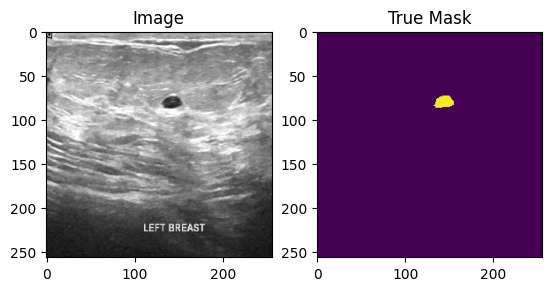

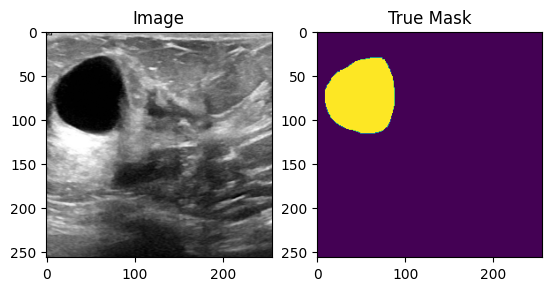

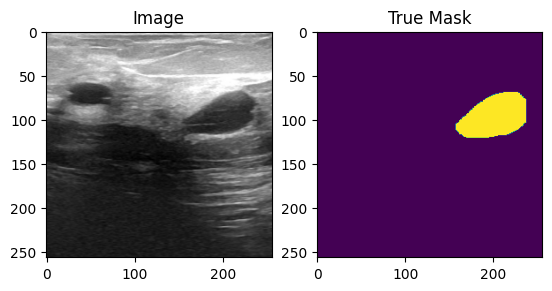

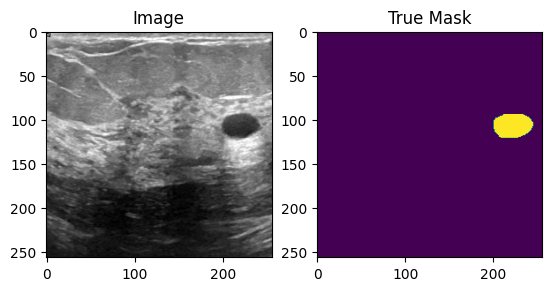

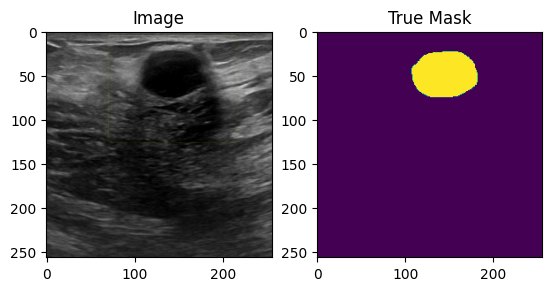

In [ ]:
for i in range(5):
    image = benign_images[i]
    mask = benign_masks[i]

    # Display the image and the true mask
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax1.set_title("Image")
    ax2.imshow(mask)
    ax2.set_title("True Mask")

    plt.show()

## Definindo e Ajustando Modelo


Esse trecho de código está construindo um modelo DeepUNet, um tipo de rede neural usado principalmente em tarefas de segmentação de imagens. Ele segue uma arquitetura conhecida por seu processo de codificação (downsampling) e decodificação (upsampling).

A função create_downsample_layer cria uma camada de downsampling que consiste em uma convolução, normalização por lotes (batch normalization) e ativação ReLU, seguida por uma operação de max pooling. Isso reduz a resolução espacial e extrai características importantes.

A função create_upsample_layer cria uma camada de upsampling que consiste em uma convolução, normalização por lotes e ativação ReLU, seguida por uma operação de upsampling. Isso aumenta a resolução espacial e ajuda na reconstrução da informação.

O exemplo de uso cria a arquitetura do DeepUNet:

Encoder (parte de codificação): As camadas de downsampling são aplicadas sequencialmente, cada uma reduzindo a resolução espacial e aumentando o número de canais/filtros para capturar informações relevantes. Entre as camadas de downsampling, o dropout é aplicado para regularização, ajudando a evitar o overfitting.

Decoder (parte de decodificação): Em seguida, as camadas de upsampling são aplicadas de forma inversa para reconstruir a resolução espacial reduzida, permitindo a recuperação das características importantes e detalhes da imagem original. O dropout também é utilizado aqui para regularização.

A arquitetura termina com uma camada de saída que usa uma convolução 1x1 para gerar a máscara de segmentação da imagem de saída, usando a ativação sigmoid para produzir valores entre 0 e 1 para cada pixel, representando a probabilidade de pertencer à classe de interesse.

Essa estrutura é útil em tarefas de segmentação, onde o objetivo é identificar e delinear áreas de interesse em uma imagem.

In [ ]:
def create_upsample_layer(filters, kernel_size, padding='same', kernel_initializer='glorot_uniform'): #kernel_initialier ='he_normal'
    """ This function creates a layer that upsamples an input tensor using a convolutional, batch
    normalization, and ReLU activation, followed by an upsampling operation. """
    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = UpSampling2D(size=(2, 2))(x)
        return x
    return layer

def create_downsample_layer(filters, kernel_size, padding='same', kernel_initializer='glorot_uniform'):
    """ This function creates a layer that downsamples an input tensor using a convolutional, batch
    normalization, and ReLU activation, followed by a max pooling operation. """
    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPool2D(pool_size=(2, 2))(x)
        return x
    return layer

dropout_rate = 0.15

# Example usage
inputs = Input(shape=(256, 256, 3)) #256
# Encoder part of the DeepUNet
x = create_downsample_layer(64, 3, padding='same', kernel_initializer='glorot_uniform')(inputs)#64
x = create_downsample_layer(128, 3, padding='same', kernel_initializer='glorot_uniform')(x)#128
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(256, 3, padding='same', kernel_initializer='glorot_uniform')(x) #256
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(512, 3, padding='same', kernel_initializer='glorot_uniform')(x)#512
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(1024, 3, padding='same', kernel_initializer='glorot_uniform')(x)#1024
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(2048, 3, padding='same', kernel_initializer='glorot_uniform')(x)#2048
x = Dropout(dropout_rate)(x)

# Decoder part of the DeepUNet
x = create_upsample_layer(1024, 3, padding='same', kernel_initializer='glorot_uniform')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(512, 3, padding='same', kernel_initializer='glorot_uniform')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(256, 3, padding='same', kernel_initializer='glorot_uniform')(x) #256
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(128, 3, padding='same', kernel_initializer='glorot_uniform')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(64, 3, padding='same', kernel_initializer='glorot_uniform')(x)#64
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(32, 3, padding='same', kernel_initializer='glorot_uniform')(x)#32
outputs = Conv2D(1, 1, padding = 'same', activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)


O método model.summary() é uma função em muitos frameworks de deep learning, incluindo o TensorFlow e o Keras, que fornece uma visão geral compacta do modelo neural. Quando você chama model.summary(), ele exibe uma tabela que resume a arquitetura do modelo, mostrando informações importantes sobre cada camada.

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization_23 (Ba  (None, 256, 256, 64)      256       
 tchNormalization)                                               
                                                                 
 re_lu_23 (ReLU)             (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 128)     7385

Claro, esses são dois callbacks úteis em treinamentos de modelos de aprendizado de máquina, comumente usados em frameworks como Keras, para controlar o processo de treinamento. Aqui está a explicação para cada um deles:

EarlyStopping (Parada Antecipada):

Monitor: Define qual métrica o callback irá monitorar, nesse caso, "val_loss", ou seja, a perda no conjunto de validação.
Patience (Paciência): Representa o número de épocas sem melhora após as quais o treinamento será interrompido. Se não houver melhorias na métrica monitorada após 20 épocas (no caso desse exemplo), o treinamento será interrompido.
Verbose: Define o nível de detalhe das mensagens exibidas durante o treinamento. Quando definido como 1, fornece informações sobre o processo de interrupção.
Mode (Modo): Determina se a métrica monitorada deve ser maximizada ou minimizada. No modo 'auto', a parada antecipada detecta automaticamente se a métrica está melhorando ou piorando.
Restore_best_weights (Restaurar os Melhores Pesos): Se definido como True, restaura os pesos do modelo para aqueles correspondentes à melhor época, evitando que o modelo final seja afetado por uma época onde a métrica de validação foi pior.
ReduceLROnPlateau (Reduzir Taxa de Aprendizagem na Plataforma):

Monitor: Monitora a mesma métrica que o EarlyStopping, neste caso, "val_loss".
Factor (Fator): Fator pelo qual a taxa de aprendizagem será reduzida. No exemplo, se a métrica monitorada não melhorar após a paciência de 10 épocas, a taxa de aprendizagem é reduzida em um fator de 0.1 (diminui para 1/10 do valor anterior).
Patience (Paciência): Número de épocas sem melhora após o qual a taxa de aprendizagem é reduzida. No caso, após 10 épocas sem melhora na métrica, a taxa de aprendizagem é ajustada.
Verbose: Nível de detalhe das mensagens durante o treinamento, exibindo informações sobre a redução da taxa de aprendizagem.
Mode: Similar ao EarlyStopping, permite o ajuste automático com base na melhoria ou piora da métrica.
Esses callbacks são estratégias para ajudar a evitar overfitting e melhorar o desempenho do modelo. O EarlyStopping interrompe o treinamento quando não há mais melhorias significativas na métrica monitorada, e o ReduceLROnPlateau ajusta dinamicamente a taxa de aprendizagem para ajudar o modelo a convergir para uma solução melhor.

In [ ]:
# Define early stopping and reduce learning rate on plateau callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,
                              verbose=1, mode='auto')

Essa função, denominada dice_loss, implementa a métrica conhecida como Dice Loss, comumente usada em tarefas de segmentação de imagens ou em problemas de análise de objetos onde a sobreposição (interseção) entre o rótulo verdadeiro e a previsão é significativa.

Aqui está o que cada parte do código faz:

Flatten (Achatamento): Transforma os tensores de entrada (y_true e y_pred) em um formato unidimensional, facilitando o cálculo da interseção e união.

Cálculo da interseção e união:

Interseção: Multiplica os valores previstos (y_pred_flat) pelos valores reais (y_true_flat) e então soma esses resultados. Isso calcula a interseção entre a máscara de predição e a máscara verdadeira.
União: Soma separadamente os valores verdadeiros (y_true_flat) e os valores previstos (y_pred_flat).
Cálculo da Dice Loss:

Utiliza a fórmula do Dice Coefficient (ou Similaridade de Dice), que é 1 menos o Coeficiente de Dice (ou Dice Similarity Coefficient). Este coeficiente é uma métrica que varia de 0 a 1, onde 1 indica sobreposição perfeita entre a máscara prevista e a máscara verdadeira, e 0 indica nenhuma sobreposição.
A fórmula é:
1
−
2
×
interse
c
¸
a
˜
o
uni
a
˜
o
1−
uni
a
˜
 o
2×interse
c
¸
​
  
a
˜
 o
​
 .
Compilação do Modelo:

Usa essa função dice_loss como função de perda (loss) durante o treinamento do modelo. Isso significa que, durante o treinamento, o modelo tentará minimizar essa função, buscando melhorar a sobreposição entre as previsões e os rótulos reais.
Além disso, o modelo é compilado com o otimizador 'adam' e a métrica 'accuracy' para avaliar o desempenho do modelo durante o treinamento.
A utilização do Dice Loss é comum em problemas de segmentação de imagens, onde a métrica de sobreposição é crucial para avaliar a qualidade das previsões em relação aos rótulos verdadeiros.

In [ ]:
def dice_loss(y_true, y_pred):
    # Flatten the predictions and ground truth
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])

    # Compute the intersection and union
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat)

    # Compute the Dice loss
    dice_loss = 1 - 2 * intersection / union

    return dice_loss

# Compile the model with the Dice loss
model.compile(loss=dice_loss, optimizer='adam', metrics=['accuracy'])

In [ ]:
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

NameError: ignored

#### Treinando o modelo

In [ ]:
print("train_images shape:", train_images.shape)
print("train_masks shape:", train_masks.shape)

train_images shape: (702, 192, 192, 3)
train_masks shape: (702, 192, 192)


In [ ]:
# Define the number of epochs and the batch size
num_epochs = 50 # 50
batch_size = 16

# Set seed
# tf.random.set_seed(42)
tf.random.set_seed(1)

# Train the UNet model on the training data
history = model.fit(#dataset,
                    train_images,
                    train_masks,
                    batch_size=batch_size, epochs=num_epochs,
                    callbacks=[early_stop, reduce_lr],
                    validation_data=(val_images, val_masks))

Epoch 1/50
44/44 [==============================] - 38s 538ms/step - loss: 0.7316 - accuracy: 0.7302 - val_loss: 0.8769 - val_accuracy: 0.1499 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - 15s 334ms/step - loss: 0.6578 - accuracy: 0.8668 - val_loss: 0.8601 - val_accuracy: 0.2913 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - 15s 331ms/step - loss: 0.6024 - accuracy: 0.8987 - val_loss: 0.8651 - val_accuracy: 0.2570 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - 15s 334ms/step - loss: 0.5336 - accuracy: 0.9185 - val_loss: 0.8316 - val_accuracy: 0.4657 - lr: 0.0010
Epoch 5/50
44/44 [==============================] - 15s 333ms/step - loss: 0.4705 - accuracy: 0.9289 - val_loss: 0.7069 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 6/50
44/44 [==============================] - 15s 333ms/step - loss: 0.4157 - accuracy: 0.9385 - val_loss: 0.6153 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 7/50
44/44 [==============================] - 14s 329ms/st

## Visualizando o desempenho e as previsões do modelo

Esse conjunto de instruções cria um gráfico para visualizar a relação entre o número de épocas durante o treinamento de um modelo de aprendizado de máquina e os valores de perda e precisão (accuracy) no conjunto de validação.

Aqui está o que cada parte do código faz:

Criação da lista de épocas e listas de valores de val_loss e val_accuracy:

epochs_list é uma lista de números inteiros de 1 até o número de épocas no histórico do treinamento (history.history['val_loss'] é usado para determinar o número de épocas). Isso permitirá que o eixo x do gráfico represente as épocas.
val_loss e val_accuracy são listas que armazenam os valores de perda e precisão no conjunto de validação, respectivamente, ao longo das épocas de treinamento.
Configuração do Gráfico:

plt.subplot(111): Cria um subplot com uma única linha e uma única coluna. Esse subplot é usado para plotar a precisão (accuracy) no eixo y, representado pela cor vermelha.
ax1.plot(epochs_list, val_accuracy, 'r-'): Plota a precisão no eixo y do ax1 em relação ao número de épocas no eixo x.
ax1.set_ylabel('Validation Accuracy', color='r'): Define o rótulo do eixo y como "Validation Accuracy" com a cor vermelha.
Criação de um segundo eixo y para val_loss:

ax1.twinx(): Cria um segundo eixo y que compartilha o mesmo eixo x (epochs_list) com o primeiro. Isso permite que ambos os gráficos sejam sobrepostos.
ax2.plot(epochs_list, val_loss, 'b-'): Plota a perda (loss) no eixo y do ax2 em relação ao número de épocas no eixo x.
ax2.set_ylabel('Validation Loss', color='b'): Define o rótulo do eixo y como "Validation Loss" com a cor azul.
Ajuste das Escalas dos Eixos:

ax1.set_ylim([0.1, 1]) e ax2.set_ylim([0.1, 1]): Define o intervalo de exibição nos eixos y para ambas as métricas (precisão e perda) entre 0.1 e 1.
Exibição do Gráfico:

plt.show(): Mostra o gráfico com as métricas de precisão e perda ao longo das épocas de treinamento.
Esse gráfico permite visualizar como a precisão e a perda no conjunto de validação se comportam à medida que o modelo é treinado por um número crescente de épocas.

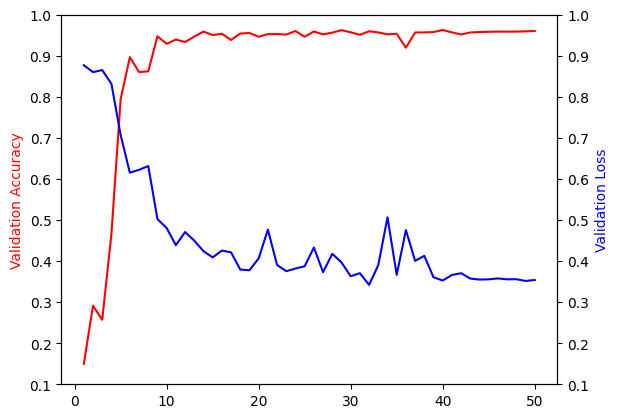

In [ ]:
# Epochs and corresponding val_loss and val_accuracy values
epochs_list = list(range(1, len(history.history['val_loss']) + 1))
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the epoch vs val_loss
ax1 = plt.subplot(111)
ax1.plot(epochs_list, val_accuracy, 'r-')
ax1.set_ylabel('Validation Accuracy', color='r')

# Create a second y-axis for the val_accuracy
ax2 = ax1.twinx()
ax2.plot(epochs_list, val_loss, 'b-')
ax2.set_ylabel('Validation Loss', color='b')

# Set the same scaling on the y-axes
ax1.set_ylim([0.1, 1])
ax2.set_ylim([0.1, 1])

plt.show()

Esse trecho de código executa um loop que itera cinco vezes (de 0 a 4) para realizar uma visualização de comparação entre as imagens originais, as máscaras verdadeiras e as máscaras previstas pelo modelo.

Aqui está o que cada parte do código faz:

Loop de 5 iterações:

Executa o código abaixo em cada iteração do loop para cinco amostras.
Seleção de uma imagem e sua máscara verdadeira:

image = test_images[i]: Seleciona uma imagem do conjunto de testes.
mask = test_masks[i]: Seleciona a máscara verdadeira correspondente a essa imagem.
Geração da previsão usando o modelo:

prediction = model.predict(image[None, ...])[0]: Realiza uma previsão usando o modelo. O image[None, ...] é utilizado para adicionar uma dimensão extra para que o modelo possa processar a imagem individualmente.
Visualização das imagens e máscaras:

Cria uma figura (fig) com dois subplots (duas imagens lado a lado) para visualizar a imagem original e a máscara verdadeira.
Os subplots são configurados para exibir a imagem original em ax1 com o título "Image" e a máscara verdadeira em ax2 com o título "True Mask".
Visualização da imagem e da previsão do modelo:

Cria uma nova figura (fig) com dois subplots para visualizar a imagem original e a máscara prevista pelo modelo.
Os subplots são configurados para exibir a imagem original em ax1 com o título "Image" e a máscara prevista em ax2 com o título "Model Mask".
Exibição das figuras:

plt.show(): Mostra as figuras com as imagens originais, as máscaras verdadeiras e as máscaras previstas pelo modelo para a iteração atual do loop.
No entanto, há um problema potencial nesse código: ele cria duas figuras separadas para exibir as previsões, mas a segunda figura substitui a primeira, então apenas a última iteração do loop exibirá as imagens previstas pelo modelo. Para corrigir isso, é necessário ajustar a lógica de criação das figuras e subplots para que ambas as previsões sejam exibidas corretamente.

1/1 [==============================] - 1s 1s/step


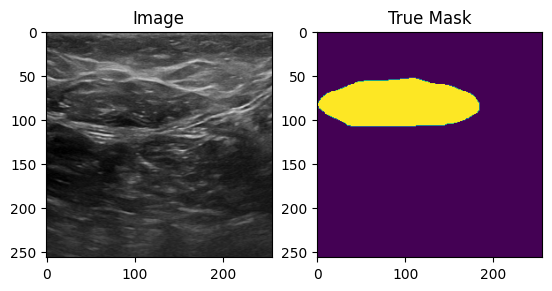

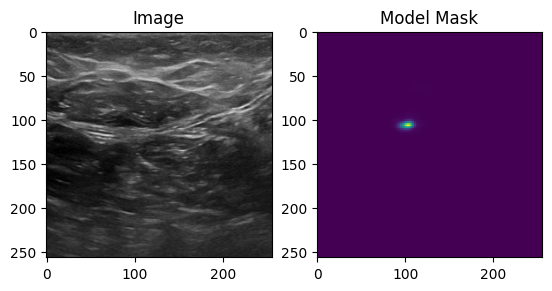

1/1 [==============================] - 0s 23ms/step


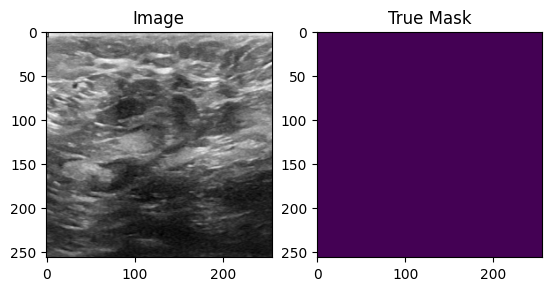

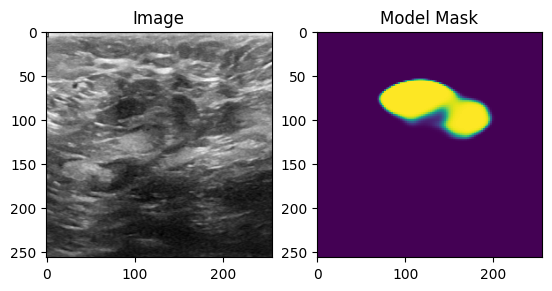

1/1 [==============================] - 0s 22ms/step


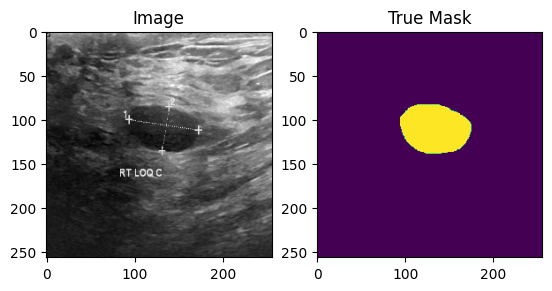

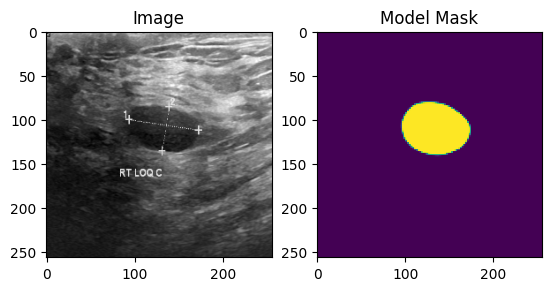

1/1 [==============================] - 0s 34ms/step


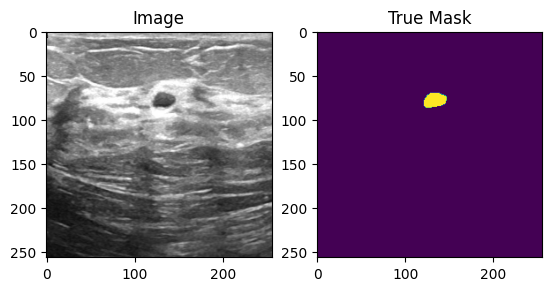

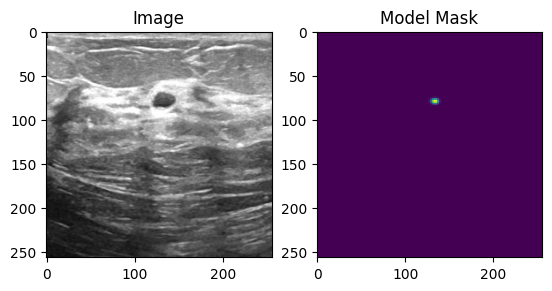

1/1 [==============================] - 0s 36ms/step


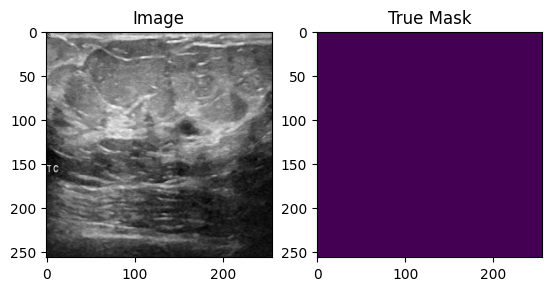

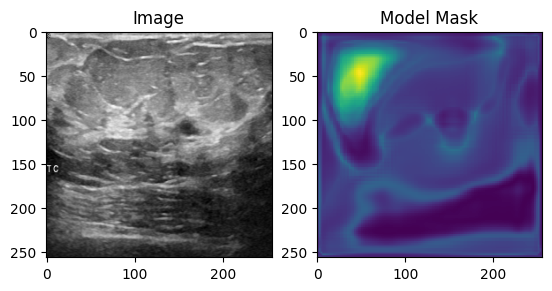

In [ ]:
for i in range(5):
    # Select an image and its true mask
    image = test_images[i]
    mask = test_masks[i]

    # Make a prediction using the model
    prediction = model.predict(image[None, ...])[0]

    # Display the image and the true mask
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax1.set_title("Image")
    ax2.imshow(mask)
    ax2.set_title("True Mask")

    # Display the image and the model's prediction
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax1.set_title("Image")
    ax2.imshow(prediction)
    ax2.set_title("Model Mask")

    plt.show()

Existem alguns motivos pelos quais o modelo pode ter um desempenho ruim em imagens sem câncer. Uma razão é que ele simplesmente não foi treinado com exemplos suficientes desses tipos de imagens. Isso significa que o modelo não possui informações suficientes para classificar essas imagens com precisão. Outra razão pode ser que o modelo esteja se ajustando demais às imagens que contêm câncer e, portanto, não seja capaz de generalizar bem para imagens sem câncer.

## Métricas do modelo

Esse conjunto de comandos avalia o desempenho de um modelo em um conjunto de teste, usando várias métricas comuns de avaliação em problemas de segmentação de imagem.

Predições nas imagens de teste:

predictions = model.predict(test_images): Gera previsões do modelo nas imagens de teste, produzindo um conjunto de máscaras previstas.
Cálculo do Índice de Jaccard Médio (Mean IoU):

mean_iou = tf.keras.metrics.MeanIoU(num_classes=2): Cria um objeto de métrica MeanIoU, inicializado para duas classes (nesse caso, provavelmente para segmentação binária).
mean_iou.update_state(test_masks, predictions): Calcula o Índice de Jaccard Médio entre as máscaras verdadeiras (test_masks) e as máscaras previstas (predictions) e atualiza o estado da métrica.
print("Mean IoU on test set: {:.3f}".format(mean_iou.result())): Imprime o Índice de Jaccard Médio no conjunto de teste. Essa métrica avalia a sobreposição entre as máscaras previstas e verdadeiras, indicando a qualidade da segmentação.
Cálculo de Precisão, Recall e F1-Score:

precision = tf.keras.metrics.Precision() e recall = tf.keras.metrics.Recall(): Criam objetos de métricas para precisão e recall.
precision.update_state(test_masks, predictions) e recall.update_state(test_masks, predictions): Calculam a precisão e o recall entre as máscaras verdadeiras e as máscaras previstas.
f1_score = 2 * (precision.result() * recall.result()) / (precision.result() + recall.result()): Calcula o F1-Score, uma medida única que combina precisão e recall para avaliar o desempenho do modelo.
print("F1 score on test set: {:.3f}".format(f1_score)): Imprime o F1-Score no conjunto de teste.
Reset das Métricas:

mean_iou.reset_states(), precision.reset_states(), recall.reset_states(): Reseta o estado das métricas para prepará-las para novas atualizações em novos conjuntos de dados.
Essas métricas fornecem diferentes perspectivas sobre o desempenho do modelo de segmentação de imagem. O Índice de Jaccard Médio mede a sobreposição entre as máscaras previstas e verdadeiras, enquanto a precisão, recall e F1-Score são métricas clássicas de avaliação que consideram tanto os verdadeiros positivos quanto os falsos positivos e falsos negativos.

In [ ]:
# Make predictions on the test images
predictions = model.predict(test_images)

# Compute the mean IoU metric on the test set
mean_iou = tf.keras.metrics.MeanIoU(num_classes=2)
mean_iou.update_state(test_masks, predictions)
print("Mean IoU on test set: {:.3f}".format(mean_iou.result()))

# Compute the precision and recall on the test set
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

precision.update_state(test_masks, predictions)
recall.update_state(test_masks, predictions)

# Compute the F1 score on the test set
f1_score = 2 * (precision.result() * recall.result()) / (precision.result() + recall.result())
print("F1 score on test set: {:.3f}".format(f1_score))

# Reset the metrics
mean_iou.reset_states()
precision.reset_states()
recall.reset_states()

1/1 [==============================] - 0s 33ms/step
Mean IoU on test set: 0.757
F1 score on test set: 0.776


#____________________________________________________________

In [ ]:
import cv2
import numpy as np
# Define the paths to the three folders
benign_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/benign'
malignant_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/malignant'
normal_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/normal'

benign_images, benign_masks = preprocess_images_and_masks(benign_folder)
malignant_images, malignant_masks = preprocess_images_and_masks(malignant_folder)
normal_images, normal_masks = preprocess_images_and_masks(normal_folder)

In [ ]:
import cv2
import numpy as np
# Define the paths to the three folders
benign_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/benign'
malignant_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/malignant'
normal_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/normal'

In [ ]:
print("Benign Images Shape:", benign_images.shape)
print("Malignant Images Shape:", malignant_images.shape)
print("Normal Images Shape:", normal_images.shape)

print("Benign Masks Shape:", benign_masks.shape)
print("Malignant Masks Shape:", malignant_masks.shape)
print("Normal Masks Shape:", normal_masks.shape)

Benign Images Shape: (10, 256, 256, 3)
Malignant Images Shape: (0,)
Normal Images Shape: (0,)
Benign Masks Shape: (9, 256, 256)
Malignant Masks Shape: (0,)
Normal Masks Shape: (0,)


In [ ]:
ls '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/benign'
ls '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/malignant'
ls '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/normal'

benign/  malignant/  normal/


Matriz confusão

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtendo previsões de probabilidade do modelo para os dados de teste
previsoes_prob = model.predict(val_images, val_masks)

# Obtendo previsões de probabilidade do modelo para os dados de teste
previsoes_prob = model.predict(val_images, val_masks)

# Convertendo as previsões de probabilidade para classes previstas
previsoes = np.argmax(previsoes_prob, axis=1)

# Criando a matriz de confusão
matriz_confusao = confusion_matrix(rotulos_de_teste, previsoes)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import imageio.v2 as imageio
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout
from keras import Input, Model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
def preprocess_images_and_masks(folder_path):

  # Sort the list of filenames
  filenames = sorted(os.listdir(folder_path))

  # Load the images and masks from the folder
  # Taking out multiple masks for one image because I am a coward
  images = [cv2.imread(os.path.join(folder_path, f)) for f in filenames if f.endswith('.png') and not (f.endswith('_mask.png') or f.endswith('_mask_1.png') or f.endswith('_mask_2.png'))]
  masks = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_GRAYSCALE) for f in filenames if f.endswith('_mask.png')]

  # Resize the images and masks to a desired size
  desired_size = (256, 256)
  images = [cv2.resize(image, desired_size) for image in images]
  masks = [cv2.resize(mask, desired_size, interpolation=cv2.INTER_NEAREST) for mask in masks]

  # Convert the images to RGB format (if they are not already)
  images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

  # Normalize the pixel values of the images and masks
  images = [image / 255.0 for image in images]
  masks = [mask / 255.0 for mask in masks]

  # Convert the images and masks to numpy arrays
  images = np.array(images)
  masks = np.array(masks)

  return images, masks

Redimensionado as imagens

In [ ]:
import cv2
import numpy as np

# Especificar a forma desejada (altura, largura)
desired_shape = (250, 250)

# Redimensionar as imagens
benign_images_resized = np.array([cv2.resize(img, desired_shape) for img in benign_images])
malignant_images_resized = np.array([cv2.resize(img, desired_shape) for img in malignant_images])
normal_images_resized = np.array([cv2.resize(img, desired_shape) for img in normal_images])

# Certifique-se de que todas as imagens têm 3 dimensões (altura, largura, canais de cor)
benign_images_resized = np.expand_dims(benign_images_resized, axis=-1)
malignant_images_resized = np.expand_dims(malignant_images_resized, axis=-1)
normal_images_resized = np.expand_dims(normal_images_resized, axis=-1)

# Concatenar as imagens
images = np.concatenate((benign_images_resized, malignant_images_resized, normal_images_resized), axis=0)

# Redimensionar as máscaras
benign_masks_resized = np.array([cv2.resize(mask, desired_shape) for mask in benign_masks])
malignant_masks_resized = np.array([cv2.resize(mask, desired_shape) for mask in malignant_masks])
normal_masks_resized = np.array([cv2.resize(mask, desired_shape) for mask in normal_masks])

# Certifique-se de que todas as máscaras têm 3 dimensões (altura, largura, canais)
benign_masks_resized = np.expand_dims(benign_masks_resized, axis=-1)
malignant_masks_resized = np.expand_dims(malignant_masks_resized, axis=-1)
normal_masks_resized = np.expand_dims(normal_masks_resized, axis=-1)

# Concatenar as máscaras
masks = np.concatenate((benign_masks_resized, malignant_masks_resized, normal_masks_resized), axis=0)

ValueError: ignored

In [ ]:
# Define the paths to the three folders
benign_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/benign'
malignant_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/malignant'
normal_folder = '/content/drive/MyDrive/DataBase _Mama/Dataset_Avanti/normal'

# Preprocess the images and masks from the folders
benign_images, benign_masks = preprocess_images_and_masks(benign_folder)
malignant_images, malignant_masks = preprocess_images_and_masks(malignant_folder)
normal_images, normal_masks = preprocess_images_and_masks(normal_folder)

# Concatenate the images and masks from the three folders
images = np.concatenate((benign_images, malignant_images, normal_images), axis=0)
masks = np.concatenate((benign_masks, malignant_masks, normal_masks), axis=0)

ValueError: ignored

In [ ]:
# Check the dimensions of the images and masks arrays
if len(images) == 0 or len(masks) == 0:
  print("Error: Images or masks array is empty")
elif len(images) != len(masks):
  print("Error: Mismatch in number of images and masks")
else:
  # Shuffle the images and masks together
  combined = list(zip(images, masks))
  np.random.shuffle(combined)
  images, masks = zip(*combined)

  # Convert the images and masks to numpy arrays
  images = np.array(images)
  masks = np.array(masks)

  # Calculate the number of images in each split
  num_images = len(images)
  num_train = int(0.90 * num_images)
  num_val = int(0.075 * num_images)
  num_test = num_images - num_train - num_val

  # Split the images and masks into training, validation, and test sets
  train_images = images[:num_train]
  train_masks = masks[:num_train]
  val_images = images[num_train:num_train+num_val]
  val_masks = masks[num_train:num_train+num_val]
  test_images = images[num_train+num_val:]
  test_masks = masks[num_train+num_val:]

In [ ]:
for i in range(5):
    image = benign_images[i]
    mask = benign_masks[i]

    # Display the image and the true mask
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax1.set_title("Image")
    ax2.imshow(mask)
    ax2.set_title("True Mask")

    plt.show()